In [1]:
import tensorflow as tf

c:\Users\Lenovo\AppData\Local\Programs\Python\Python313\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/attr_value.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
c:\Users\Lenovo\AppData\Local\Programs\Python\Python313\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/tensor.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
c:\Users\Lenovo\AppData\Local\Programs\Python\Python313\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/fram

In [2]:
from tensorflow import keras
from keras import Sequential
from keras.layers import  Dense, Conv2D, MaxPooling2D, Flatten


In [3]:
train_ds=keras.utils.image_dataset_from_directory(
    directory='C:/Users/Lenovo/OneDrive/Documents/Project_Career/Deeplearning_Project/Train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

Found 23650 files belonging to 2 classes.


In [4]:
validation_ds= keras.utils.image_dataset_from_directory(
    directory='C:/Users/Lenovo/OneDrive/Documents/Project_Career/Deeplearning_Project/Test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

Found 3863 files belonging to 2 classes.


In [5]:
def process(image,label):
    image= tf.cast(image/255. ,tf.float32)
    return image,label
train_ds= train_ds.map(process)
validation_ds= validation_ds.map(process)


In [6]:
model= Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3))) 
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3))) 
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3))) 
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))




c:\Users\Lenovo\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 28800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,686,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,714,241 (14.17 MB)

 Trainable params: 3,714,241 (14.17 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [10]:
model.fit(train_ds,epochs=3,validation_data=validation_ds)

Epoch 1/3
740/740 ━━━━━━━━━━━━━━━━━━━━ 312s 421ms/step - accuracy: 0.8589 - loss: 0.3250 - val_accuracy: 0.8405 - val_loss: 0.3764
Epoch 2/3
740/740 ━━━━━━━━━━━━━━━━━━━━ 293s 395ms/step - accuracy: 0.9272 - loss: 0.1830 - val_accuracy: 0.8512 - val_loss: 0.4581
Epoch 3/3
740/740 ━━━━━━━━━━━━━━━━━━━━ 297s 401ms/step - accuracy: 0.9593 - loss: 0.1076 - val_accuracy: 0.8651 - val_loss: 0.5376


In [13]:
import cv2

In [14]:
test_img=cv2.imread('C:/Users/Lenovo/OneDrive/Documents/Project_Career/Deeplearning_Project/cat.jfif')

In [15]:
import matplotlib.pyplot as plt

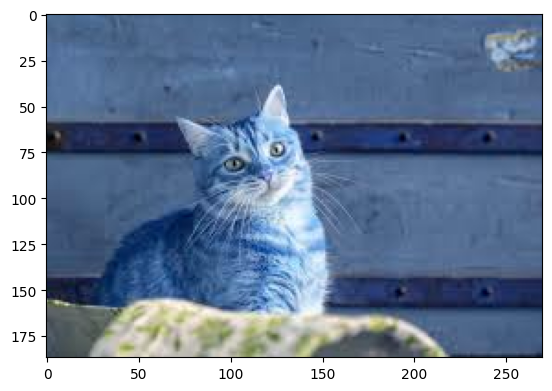

In [16]:
plt.imshow(test_img)

In [17]:
test_img.shape

(187, 270, 3)

In [18]:
test_img=cv2.resize(test_img,(256,256))
test_input=test_img.reshape((1,256,256,3))


In [19]:
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


array([[0.]], dtype=float32)

In [20]:
test_img_2=cv2.imread("C:/Users/Lenovo/OneDrive/Documents/Project_Career/Deeplearning_Project/dog.jfif")

In [21]:
test_img_2.shape

(148, 148, 3)

In [24]:
test_img_2=cv2.resize(test_img_2,(256,256))
test_input_2=test_img_2.reshape((1,256,256,3))

In [25]:
model.predict(test_input_2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


array([[1.3835288e-25]], dtype=float32)

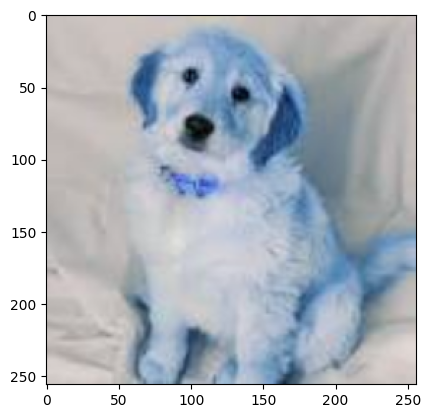

In [27]:
plt.imshow(test_img_2)